# Pythia: Data Navigation

1. List existing shares, currencies, etc

2. Load data from specific symbols


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext watermark
%watermark -v -m -p numpy,pandas,matplotlib -g

import sys
from os import path, pardir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import watermark
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
plt.style.use('seaborn-deep')
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_colwidth', -1)

sys.path.append(path.abspath(pardir))

CPython 3.7.5
IPython 7.10.0

numpy 1.17.4
pandas 0.25.3
matplotlib 3.1.2

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.0.0
machine    : x86_64
processor  : i386
CPU cores  : 16
interpreter: 64bit
Git hash   : fe8f6d53e7ad99883c1821f9cb792d228de524a7


In [2]:
from src.api_manager import *
from src.overall_commands import *

### Get the list of available currencies

In [3]:
get_fx_table(v=0)

,From,To,Period,FirstTimeStamp,LastUpdate,TimeZone,Information
0,GBP,CNY,daily,2008-09-04T00:00:00,2019-12-19 21:30:00,UTC,"Forex Daily Prices (open, high, low, close)"
1,GBP,CNY,monthly,2008-10-31T00:00:00,2019-12-19,UTC,"Forex Monthly Prices (open, high, low, close)"
2,GBP,EUR,daily,2001-11-08T00:00:00,2019-12-19 22:20:00,UTC,"Forex Daily Prices (open, high, low, close)"
3,GBP,EUR,monthly,2001-12-31T00:00:00,2019-12-19 22:20:00,UTC,"Forex Monthly Prices (open, high, low, close)"
4,GBP,INR,daily,2014-11-07T00:00:00,2019-12-19 22:15:00,UTC,"Forex Daily Prices (open, high, low, close)"
5,GBP,INR,monthly,2014-12-31T00:00:00,2019-12-19 22:15:00,UTC,"Forex Monthly Prices (open, high, low, close)"
6,GBP,USD,daily,2001-12-03T00:00:00,2019-12-19 22:20:00,UTC,"Forex Daily Prices (open, high, low, close)"
7,GBP,USD,monthly,2002-01-31T00:00:00,2019-12-19 22:20:00,UTC,"Forex Monthly Prices (open, high, low, close)"


In [4]:
get_fx_table(mode="crypto", v=0)

,From,To,Period,FirstTimeStamp,LastUpdate,TimeZone,Information
0,BTC,GBP,monthly,None,2019-12-18 00:00:00,UTC,Monthly Prices and Volumes for Digital Currency
1,BTC,GBP,daily,None,2019-12-18 00:00:00,UTC,Daily Prices and Volumes for Digital Currency
2,ETH,GBP,monthly,None,2019-12-18 00:00:00,UTC,Monthly Prices and Volumes for Digital Currency
3,USDT,GBP,monthly,None,2019-12-17 00:00:00,UTC,Monthly Prices and Volumes for Digital Currency
4,USDT,GBP,daily,None,2019-12-17 00:00:00,UTC,Daily Prices and Volumes for Digital Currency
5,XRP,GBP,monthly,None,2019-12-18 00:00:00,UTC,Monthly Prices and Volumes for Digital Currency


### Get the list shares

In [5]:
df_shares = get_shares_table(v=0)
df_shares

,Symbol,Period,Currency,Name,Type,Region,FirstTimeStamp,LastUpdate,TimeZone
0,AMAT,monthly-adjusted,USD,Applied Materials Inc.,Equity,United States,2000-01-31T00:00:00,2019-12-19 13:17:38,UTC-05
1,AMAT,daily-adjusted,USD,Applied Materials Inc.,Equity,United States,1999-12-09T00:00:00,2019-12-19 13:11:12,UTC-05
2,AMAT,monthly,USD,Applied Materials Inc.,Equity,United States,2000-01-31T00:00:00,2019-12-19 13:05:09,UTC-05
3,AMAT,daily,USD,Applied Materials Inc.,Equity,United States,None,2019-12-18,UTC-05
4,AMZN,monthly-adjusted,USD,Amazon.com Inc.,Equity,United States,2000-01-31T00:00:00,2019-12-19 13:17:44,UTC-05
5,AMZN,daily-adjusted,USD,Amazon.com Inc.,Equity,United States,1999-12-09T00:00:00,2019-12-19 13:11:15,UTC-05
6,AMZN,monthly,USD,Amazon.com Inc.,Equity,United States,2000-01-31T00:00:00,2019-12-19 13:05:07,UTC-05
7,AMZN,daily,USD,Amazon.com Inc.,Equity,United States,1999-12-07T00:00:00,2019-12-19 12:54:44,UTC-05
8,ASML.AMS,monthly-adjusted,EUR,ASML Holding N.V.,Equity,Amsterdam,2000-02-29T00:00:00,2019-12-19,UTC+01
9,ASML.AMS,daily-adjusted,EUR,ASML Holding N.V.,Equity,Amsterdam,2000-01-03T00:00:00,2019-12-19,UTC+01


### Get specific symbol

In [6]:
amzn = load_shares_data("AMZN")

Text(0, 0.5, 'close')

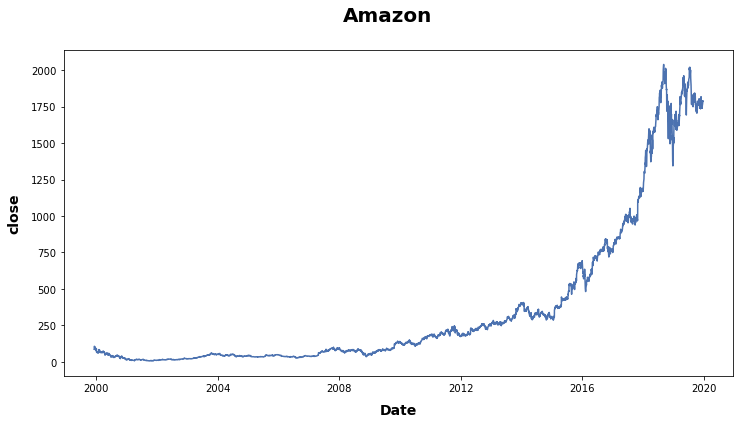

In [11]:
fig = plt.figure(figsize=(12, 6))
plt.plot(amzn.close, label='Close Price history');
fig.suptitle('Amazon', fontsize=20, weight='bold')
plt.xlabel('Date', fontsize=14, weight='bold', labelpad=10)
plt.ylabel('close', fontsize=14, weight='bold', labelpad=10)